In [1]:
import tensorflow as tf
from  tensorflow.keras import Model

The network to be built

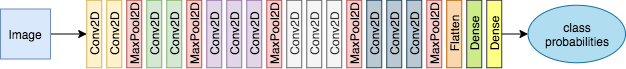

In [10]:
class Block(Model):
  def __init__(self, filters, kernel_size, repetitions):
    super(Block, self).__init__()
    self.repetitions = repetitions
    self.hiddenNetwork = {}
    for i in range(self.repetitions):
      self.hiddenNetwork[f'conv2d_{i}'] = tf.keras.layers.Conv2D(filters = filters, kernel_size = (kernel_size, kernel_size), padding = 'same', activation = 'relu')
    self.maxpooling2d = tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same')
  def call(self, inputs):
    x = self.hiddenNetwork['conv2d_0'](inputs)
    for i in range(1, self.repetitions):
      x = self.hiddenNetwork[f'conv2d_{i}'](x)
    x = self.maxpooling2d(x)
    return x

In [11]:
class VGG(Model):
  def __init__(self, num_output):
    super(VGG, self).__init__()
    self.block1 = Block(64, 3, 2)
    self.block2 = Block(128, 3, 2)
    self.block3 = Block(256, 3, 3)
    self.block4 = Block(512, 3, 3)
    self.block5 = Block(512, 3, 3)
    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(256, activation = 'relu')
    self.dense2 = tf.keras.layers.Dense(num_output, activation = 'softmax')
  def call(self, inputs):
    bl_1 = self.block1(inputs)
    bl_2 = self.block2(bl_1)
    bl_3 = self.block3(bl_2)
    bl_4 = self.block4(bl_3)
    bl_5 = self.block5(bl_4)
    flatten = self.flatten(bl_5)
    dense1 = self.dense1(flatten)
    dense2 = self.dense2(dense1)
    return dense2

In [12]:
from tensorflow.keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = np.expand_dims(x_train / 255.0, 3), np.expand_dims(x_test / 255.0, 3)

In [13]:
model = VGG(10)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [14]:
model.fit(x_train, y_train, validation_split = 0.1, epochs = 5)

Epoch 1/5
 227/1688 [===>..........................] - ETA: 40s - loss: 2.3019 - accuracy: 0.1130

KeyboardInterrupt: ignored

In [17]:
import tensorflow_datasets as tfds
dataset = tfds.load('cats_vs_dogs', split = tfds.Split.TRAIN, data_dir = 'data/')
def preprocess(feature):
  image = tf.image.resize(feature['image'], (244, 244))
  return tf.cast(image, dtype='float32') / 255.0, feature['label']
dataset = dataset.map(preprocess).batch(32)
vgg_model = VGG(2)
vgg_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
vgg_model.fit(dataset, epochs = 10)

Epoch 1/10
727/727 [==============================] - 371s 509ms/step - loss: 0.6971 - accuracy: 0.4999
Epoch 2/10
727/727 [==============================] - 360s 495ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 3/10
727/727 [==============================] - 360s 495ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 4/10
727/727 [==============================] - 360s 495ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 5/10
727/727 [==============================] - 360s 495ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 6/10
727/727 [==============================] - 360s 495ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 7/10
727/727 [==============================] - 359s 494ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 8/10
727/727 [==============================] - 360s 495ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 9/10
727/727 [==============================] - 360s 494ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 10/10
727/727 [==============================] - 360s 495m